<a href="https://colab.research.google.com/github/Dasrunaik/Fraud-Transaction-Detection-using-ML/blob/main/Frad_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score)

In [38]:
df=pd.read_csv('/content/Fraud.csv')

In [36]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.shape

(83561, 11)

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [9]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
83551,10,PAYMENT,2045.05,C544137229,127462.00,125416.95,M270744335,0.00,0.00,0.0,0.0
83552,10,CASH_OUT,425512.33,C1153742407,483.00,0.00,C1024208640,501371.85,575092.56,0.0,0.0
83553,10,CASH_OUT,22478.52,C1385095738,686619.96,664141.44,C1265705931,31308.00,321403.51,0.0,0.0
83554,10,CASH_OUT,94566.08,C87498478,664141.44,569575.36,C304909156,210704.60,305270.68,0.0,0.0
83555,10,CASH_OUT,14895.17,C214279684,51759.00,36863.83,C1298314970,979963.09,994858.25,0.0,0.0
83556,10,PAYMENT,7705.70,C1834114901,96490.00,88784.30,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.00,0.00,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.00,252650.96,C790672270,38177.07,0.00,0.0,0.0
83559,10,CASH_OUT,244279.64,C722886752,29968.00,0.00,C1492538502,25680.00,269959.64,0.0,0.0
83560,10,CASH_OUT,145014.63,C60491101,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df=df.drop(columns=['nameOrig','nameDest'],errors='ignore')

In [11]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
83556,10,PAYMENT,7705.70,96490.0,88784.30,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,56471.0,0.00,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,3481.0,252650.96,38177.07,0.00,0.0,0.0
83559,10,CASH_OUT,244279.64,29968.0,0.00,25680.00,269959.64,0.0,0.0


In [13]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,83448
1.0,112


In [14]:
df.dropna()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
83555,10,CASH_OUT,14895.17,51759.0,36863.83,979963.09,994858.25,0.0,0.0
83556,10,PAYMENT,7705.70,96490.0,88784.30,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,56471.0,0.00,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,3481.0,252650.96,38177.07,0.00,0.0,0.0


In [15]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,1
newbalanceOrig,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1
isFlaggedFraud,1


In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83560 entries, 0 to 83559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83560 non-null  int64  
 1   type            83560 non-null  object 
 2   amount          83560 non-null  float64
 3   oldbalanceOrg   83560 non-null  float64
 4   newbalanceOrig  83560 non-null  float64
 5   oldbalanceDest  83560 non-null  float64
 6   newbalanceDest  83560 non-null  float64
 7   isFraud         83560 non-null  float64
 8   isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.4+ MB


In [19]:
df['type'].value_counts()

,count
type,
PAYMENT,33529
CASH_OUT,25155
CASH_IN,16818
TRANSFER,7192
DEBIT,866


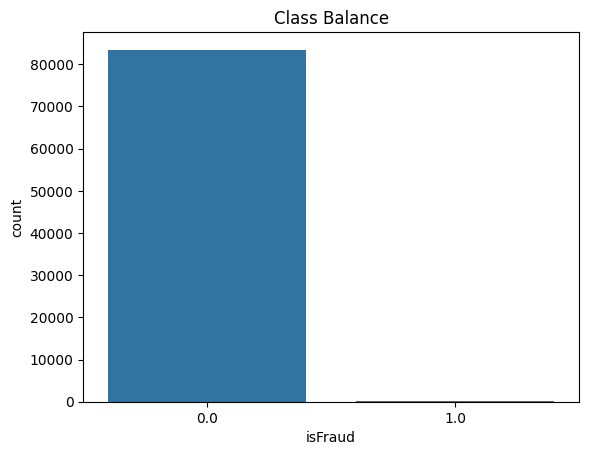

In [20]:
sns.countplot(x='isFraud', data=df)
plt.title("Class Balance")
plt.show()

Split feature and target

In [21]:
X=df.drop(columns='isFraud')
y=df['isFraud']

In [22]:
print(X.columns.tolist())

['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


In [23]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()


In [24]:
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
Categorical: ['type']


Preprocessing

In [25]:
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)])

Train Test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (66848, 8)  Test: (16712, 8)


Train Model with CV

In [28]:
pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

models = {
    "LogReg": LogisticRegression(max_iter=200, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight="balanced_subsample", random_state=42,n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, random_state=42, scale_pos_weight=pos_weight,n_jobs=-1)
}

scorer = {"roc_auc":"roc_auc","f1":"f1","precision":"precision","recall":"recall"}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
for name, model in models.items():
    pipe = ImbPipeline([("prep", preprocess), ("smote", SMOTE(random_state=42)), ("model", model)])
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scorer,n_jobs=-1)
    cv_results[name] = {m: scores[f"test_{m}"].mean() for m in scorer}
    print(name, cv_results[name])
cv_df = pd.DataFrame(cv_results).T.sort_values("roc_auc", ascending=False)
print("Cross-Validation Results:")
print(cv_df)

LogReg {'roc_auc': np.float64(0.9637382008558053), 'f1': np.float64(0.03363673806470685), 'precision': np.float64(0.017143105471549673), 'recall': np.float64(0.9111111111111111)}
RandomForest {'roc_auc': np.float64(0.9645118790849578), 'f1': np.float64(0.47448191146559415), 'precision': np.float64(0.40224087369804834), 'recall': np.float64(0.5888888888888889)}
XGBoost {'roc_auc': np.float64(0.9371446474947556), 'f1': np.float64(0.17748024615418614), 'precision': np.float64(0.10094958822704969), 'recall': np.float64(0.7777777777777778)}
Cross-Validation Results:
               roc_auc        f1  precision    recall
RandomForest  0.964512  0.474482   0.402241  0.588889
LogReg        0.963738  0.033637   0.017143  0.911111
XGBoost       0.937145  0.177480   0.100950  0.777778


Best Model

In [29]:
best_model = max(cv_results, key=lambda k: cv_results[k]["roc_auc"])
print("Best Model:", best_model)

final_pipe = ImbPipeline([("prep", preprocess), ("smote", SMOTE(random_state=42)), ("model", models[best_model])])
final_pipe.fit(X_train, y_train)

y_pred = final_pipe.predict(X_test)
y_proba = final_pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Best Model: RandomForest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16690
         1.0       0.52      0.77      0.62        22

    accuracy                           1.00     16712
   macro avg       0.76      0.89      0.81     16712
weighted avg       1.00      1.00      1.00     16712

Confusion Matrix:
 [[16674    16]
 [    5    17]]
ROC AUC: 0.9958194890789259


ROC and PR curves

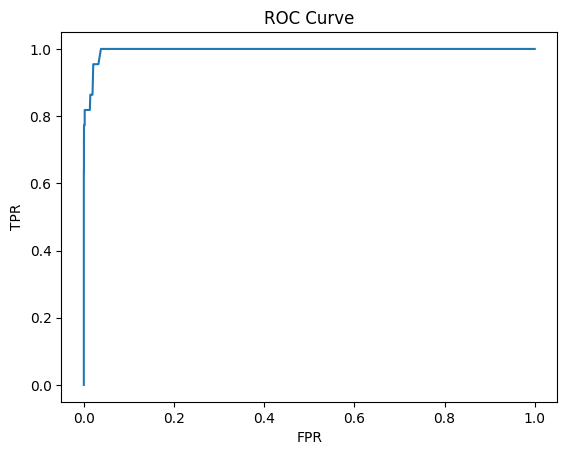

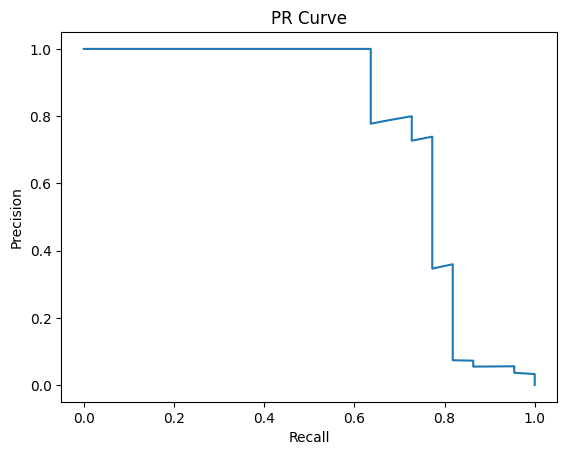

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.show()

prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.plot(rec, prec, label="PR Curve")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("PR Curve"); plt.show()

Feature Importance

num__step              0.202315
num__oldbalanceOrg     0.172160
num__newbalanceOrig    0.130165
cat__type_PAYMENT      0.121319
num__oldbalanceDest    0.099735
cat__type_TRANSFER     0.087701
num__amount            0.058958
num__newbalanceDest    0.053116
cat__type_CASH_OUT     0.036815
cat__type_CASH_IN      0.036222
cat__type_DEBIT        0.001494
num__isFlaggedFraud    0.000000
dtype: float64


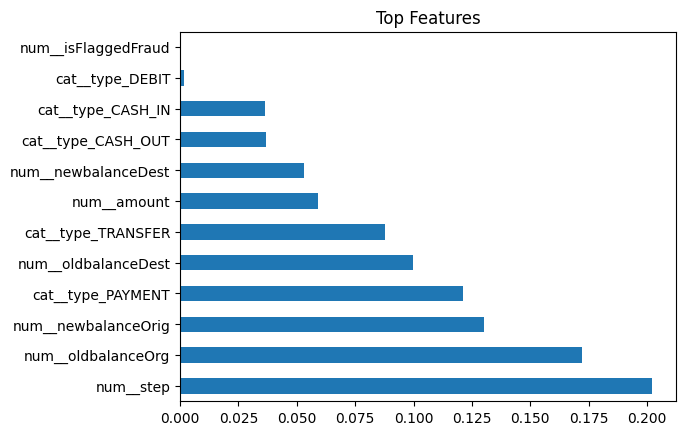

In [32]:
prep = final_pipe.named_steps["prep"]
prep.fit(X_train)
feature_names = prep.get_feature_names_out()

model = final_pipe.named_steps["model"]
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
elif hasattr(model, "coef_"):
    importances = np.abs(model.coef_[0])
else:
    importances = None

if importances is not None:
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)
    print(fi)
    fi.plot(kind="barh", title="Top Features")
    plt.show()

Save Model

In [33]:
import joblib
joblib.dump(final_pipe, "fraud_model.pkl")
print("✅ Model saved as fraud_model.pkl")


✅ Model saved as fraud_model.pkl
